In [ ]:
# Mounting the Google Colab Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the Loan Prediction Dataset:

In [ ]:
lp=pd.read_csv('/content/drive/My Drive/DS Datasets/DT Project Datasets/loan_prediction.csv')

Identification of data types:

In [ ]:
lp.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Size of the dataset:

In [ ]:
lp.shape

(614, 13)

Statistical Summary of Numeric Variables:

In [ ]:
lp.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married  ... Credit_History Property_Area Loan_Status
0    LP001002    Male      No  ...            1.0         Urban           Y
1    LP001003    Male     Yes  ...            1.0         Rural           N
2    LP001005    Male     Yes  ...            1.0         Urban           Y
3    LP001006    Male     Yes  ...            1.0         Urban           Y
4    LP001008    Male      No  ...            1.0         Urban           Y
..        ...     ...     ...  ...            ...           ...         ...
609  LP002978  Female      No  ...            1.0         Rural           Y
610  LP002979    Male     Yes  ...            1.0         Rural           Y
611  LP002983    Male     Yes  ...            1.0         Urban           Y
612  LP002984    Male     Yes  ...            1.0         Urban           Y
613  LP002990  Female      No  ...            0.0     Semiurban           N

[614 rows x 13 columns]>

Non-Graphical Univariate Analysis:

In [ ]:
#To get the count of unique values:

lp['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [ ]:
#To get the list & number of unique values:

lp['Loan_Status'].nunique()

2

In [ ]:
#To get list of unique values

lp['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
#Finding null values

print(lp.isnull().sum(axis = 0))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
#Remove Null Values

lp.Gender.fillna(value=14.454200,inplace=True)
lp.Married.fillna(value=14.454200,inplace=True)
lp.Dependents.fillna(value=14.454200,inplace=True)
lp.Self_Employed.fillna(value=14.454200,inplace=True)
lp.LoanAmount.fillna(value=14.454200,inplace=True)
lp.Loan_Amount_Term.fillna(value=14.454200,inplace=True)
lp.Credit_History.fillna(value=14.454200,inplace=True)

#Check again if null values are handled
print(lp.isnull().sum(axis = 0))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


Graphical Univariate Analysis:

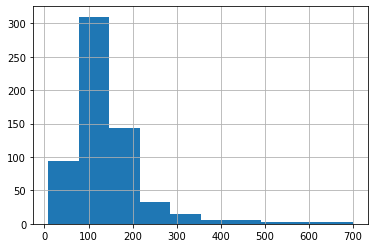

In [ ]:
#Histogram

lp['LoanAmount'].hist(bins=10)

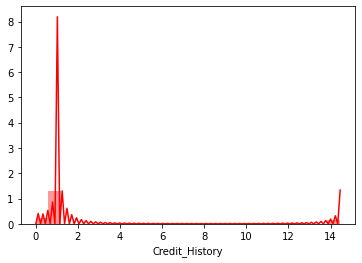

In [ ]:
#DistPlot
sns.distplot(lp[pd.notnull(lp.Credit_History)]['Credit_History'],color='red')

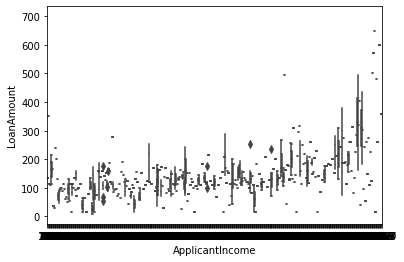

In [ ]:
#BoxPlot
#checking for outliers present in the dataset if any

sns.boxplot(x=lp['ApplicantIncome'],y=lp['LoanAmount'])

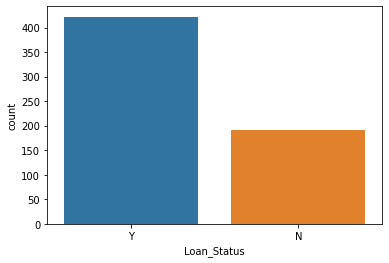

In [ ]:
#CountPlot
sns.countplot(lp.Loan_Status)

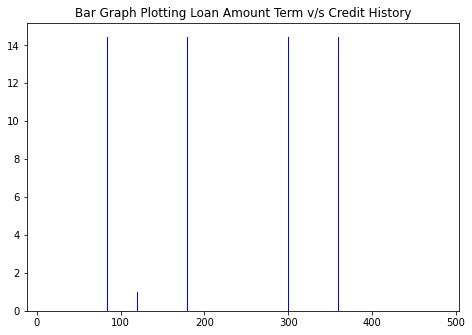

In [ ]:
#Bar Graph

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(lp['Loan_Amount_Term'],lp['Credit_History'], color = 'b')
plt.title('Bar Graph Plotting Loan Amount Term v/s Credit History')
plt.show()

In [ ]:
#checking for correaltion between variables

lp[['ApplicantIncome','LoanAmount']].corr()

,ApplicantIncome,LoanAmount
ApplicantIncome,1.000000,0.543135
LoanAmount,0.543135,1.000000


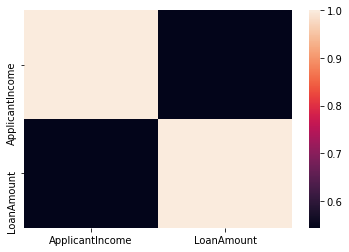

In [ ]:
#Checking correlation using Heatmap

sns.heatmap(lp[['ApplicantIncome','LoanAmount']].corr())

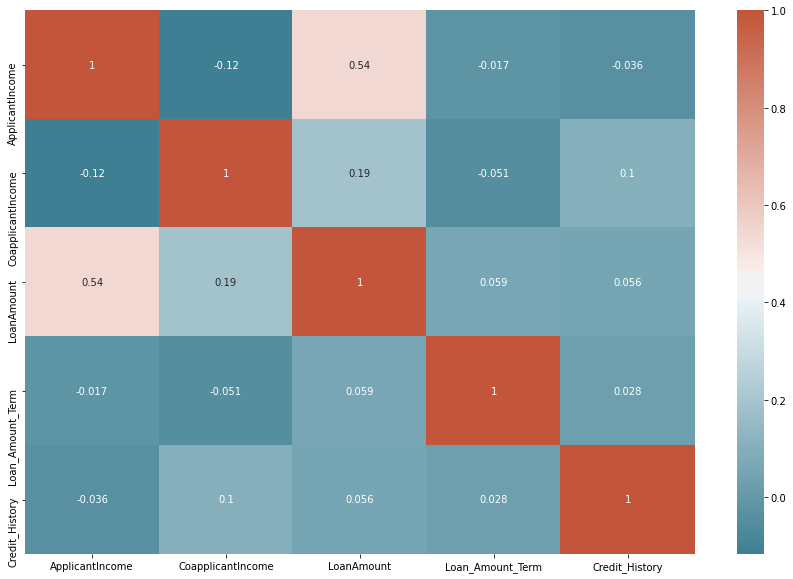

In [ ]:
corr = lp.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
#Find Avgerage 

lp.groupby('ApplicantIncome')['LoanAmount'].mean()

ApplicantIncome
150      135.0
210       98.0
416      350.0
645      113.0
674      168.0
         ...  
39147    120.0
39999    600.0
51763    700.0
63337    490.0
81000    360.0
Name: LoanAmount, Length: 505, dtype: float64

In [ ]:
#Checking the skewness

lp.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.450907
Loan_Amount_Term    -2.449994
Credit_History       3.018843
dtype: float64

In [ ]:
#using label encoding and one-hot encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
lp['ApplicantIncome'] = le.fit_transform(lp['ApplicantIncome'])
lp['LoanAmount'] = le.fit_transform(lp['LoanAmount'])
lp.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,376,0.0,1,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,306,1508.0,82,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,139,0.0,27,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,90,2358.0,74,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,381,0.0,95,360.0,1.0,Urban,Y


In [ ]:
#dummifying data required for spliting the data

lp = pd.get_dummies(lp)
lp.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001002,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,Loan_ID_LP001013,Loan_ID_LP001014,Loan_ID_LP001018,Loan_ID_LP001020,Loan_ID_LP001024,Loan_ID_LP001027,Loan_ID_LP001028,Loan_ID_LP001029,Loan_ID_LP001030,Loan_ID_LP001032,Loan_ID_LP001034,Loan_ID_LP001036,Loan_ID_LP001038,Loan_ID_LP001041,Loan_ID_LP001043,Loan_ID_LP001046,Loan_ID_LP001047,Loan_ID_LP001050,Loan_ID_LP001052,Loan_ID_LP001066,Loan_ID_LP001068,Loan_ID_LP001073,Loan_ID_LP001086,Loan_ID_LP001087,Loan_ID_LP001091,Loan_ID_LP001095,Loan_ID_LP001097,Loan_ID_LP001098,Loan_ID_LP001100,...,Loan_ID_LP002940,Loan_ID_LP002941,Loan_ID_LP002943,Loan_ID_LP002945,Loan_ID_LP002948,Loan_ID_LP002949,Loan_ID_LP002950,Loan_ID_LP002953,Loan_ID_LP002958,Loan_ID_LP002959,Loan_ID_LP002960,Loan_ID_LP002961,Loan_ID_LP002964,Loan_ID_LP002974,Loan_ID_LP002978,Loan_ID_LP002979,Loan_ID_LP002983,Loan_ID_LP002984,Loan_ID_LP002990,Gender_14.4542,Gender_Female,Gender_Male,Married_14.4542,Married_No,Married_Yes,Dependents_14.4542,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_14.4542,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,376,0.0,1,360.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1
1,306,1508.0,82,360.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,139,0.0,27,360.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1
3,90,2358.0,74,360.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1
4,381,0.0,95,360.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1


In [ ]:
#spliting the data

from sklearn.model_selection import train_test_split

y = lp['LoanAmount']
X = lp

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [ ]:
#Using Decision Tree Model

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train, y_train)
y_pred1 = dtree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         2
           2       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         2
          29       0.67      1.00      0.80         4
          30       1.00      1.00      1.00         2
          31       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          33       0.00      0.00      0.00         2
          34       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         2
          37       1.00    

In [ ]:
#Applying Random Forest Model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)
y_pred2 = rf.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.29      1.00      0.44         2
           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         0
          28       0.00      0.00      0.00         2
          29       0.00      0.00      0.00         4
          30       0.00      0.00      0.00         2
          33       0.00    

In [ ]:
#Applying Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

0.0036623540236338115
0.9999999944072083
0.0039397229366819695
0.9999999922947856


In [ ]:
# Function to calculate mean absolute error

def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_prediction = model.predict(X_test)
    model_crossV = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_crossV

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from sklearn import model_selection

In [ ]:
dtree=DecisionTreeClassifier(criterion="entropy")
dtreeg=DecisionTreeClassifier(criterion='gini')
knn=KNeighborsClassifier()
gb=GaussianNB()
rfc=RandomForestClassifier(criterion='entropy')
rfcg=RandomForestClassifier(criterion='gini')
bgc=BaggingClassifier()
adb=AdaBoostClassifier()
gbc=GradientBoostingClassifier()
xgb=XGBClassifier()
xgbrf=XGBRFClassifier()

In [ ]:
models = []
models.append(('Decision Tree',dtree))
models.append(('Decision Tree with Gini Coefficient',dtreeg))
models.append(('K Nearest Neighbors',knn))
models.append(('Naive Bayes',gb))
models.append(('Random Forrest',rfc))
models.append(('Random Forrest with Gini Coefficient',rfcg))
models.append(('Bagging Classifier',bgc))
models.append(('Ada Boost Classifier',adb))
models.append(('Gradient Boosting Classifier',gbc))
models.append(('XGB Classifier',xgb))
models.append(('XGBRF Classifier',xgbrf))

Decision Tree: 0.698810 (0.005850)
Decision Tree with Gini Coefficient: 0.698599 (0.001184)
K Nearest Neighbors: 0.039053 (0.000435)
Naive Bayes: 0.490111 (0.002349)
Random Forrest: 0.035828 (0.000255)
Random Forrest with Gini Coefficient: 0.081438 (0.000481)
Bagging Classifier: 0.649788 (0.002239)
Ada Boost Classifier: 0.060153 (0.000878)
Gradient Boosting Classifier: 0.135034 (0.000861)
XGB Classifier: 0.697039 (0.002202)
XGBRF Classifier: 0.126838 (0.002154)


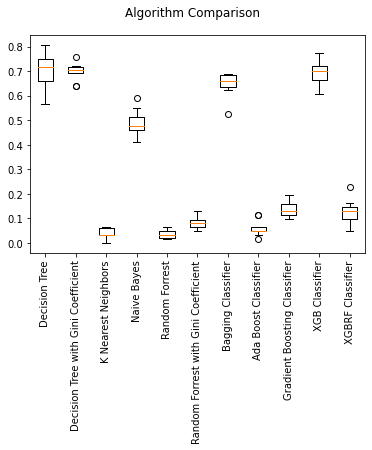

In [ ]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=123)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xticks(rotation=90)
ax.set_xticklabels(names)
plt.show()